In [1]:
# Importing libraries
import tweepy 
import snscrape.modules.twitter as sntwitter
import pandas as pd
import os
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading Tweets from Csv File

In [393]:

# Reading csv Tweets file, Tweets are from December 2016 
df = pd.read_csv("tweets2016.csv")

In [421]:
# Printing last 50 rows
df

,Unnamed: 0,Date,Tweet,State/City,Country,Polarity,Analysis
0,0.0,2016-12-31 23:59:59+00:00,wind 2 mph nw barometer 993 3 mb rising slowly...,Minoa,United States,-0.300000,Negative
1,1.0,2016-12-31 23:59:58+00:00,temp 58 0 f wind 2 0mph pressure 29 966hpa ste...,Mississippi,United States,0.166667,Positive
2,2.0,2016-12-31 23:59:58+00:00,wind 0 0 mph barometer 29 91 rising temperatur...,Petersburg,United States,0.000000,Neutral
3,3.0,2016-12-31 23:59:57+00:00,wind 6 0 mph sw barometer 29 984 falling tempe...,Howell,United States,0.000000,Neutral
4,4.0,2016-12-31 23:59:55+00:00,wind 0 mph barometer 29 777 falling temperatur...,Great Falls,United States,0.000000,Neutral
...,...,...,...,...,...,...,...
100094,99994.0,2016-12-19 14:13:03+00:00,please stop shaking snow globe dammit 2 inches...,Erie,United States,-0.500000,Negative
100095,99995.0,2016-12-19 14:12:56+00:00,big whiny little bitch high school came weather,Valparaiso,United States,-0.009167,Negative
100096,99996.0,2016-12-19 14:12:42+00:00,hate cold weather,Illinois,United States,-0.700000,Negative
100097,99997.0,2016-12-19 14:12:38+00:00,great game rain,Indiana,United States,0.200000,Positive


# Removing other countries eg. Canada, Mexico etc.

In [423]:
df = df.loc[df['Country'] == "United States"]
#printing last 50 rows
df.head(50)

,Unnamed: 0,Date,Tweet,State/City,Country,Polarity,Analysis
0,0.0,2016-12-31 23:59:59+00:00,wind 2 mph nw barometer 993 3 mb rising slowly...,Minoa,United States,-0.300000,Negative
1,1.0,2016-12-31 23:59:58+00:00,temp 58 0 f wind 2 0mph pressure 29 966hpa ste...,Mississippi,United States,0.166667,Positive
2,2.0,2016-12-31 23:59:58+00:00,wind 0 0 mph barometer 29 91 rising temperatur...,Petersburg,United States,0.000000,Neutral
3,3.0,2016-12-31 23:59:57+00:00,wind 6 0 mph sw barometer 29 984 falling tempe...,Howell,United States,0.000000,Neutral
4,4.0,2016-12-31 23:59:55+00:00,wind 0 mph barometer 29 777 falling temperatur...,Great Falls,United States,0.000000,Neutral
5,5.0,2016-12-31 23:59:54+00:00,wind 0 4 mph sw barometer 29 654 falling slowl...,Minnesota,United States,-0.300000,Negative
6,6.0,2016-12-31 23:59:51+00:00,19 00 01 temp 43 0 f wind chill 43 0 f dew poi...,Georgia,United States,0.000000,Neutral
7,7.0,2016-12-31 23:59:49+00:00,im way pick devon went fucking side ways rn lo...,Pico Rivera,United States,-0.050000,Negative
10,10.0,2016-12-31 23:59:08+00:00,15 51 fremont canyon weather station reports s...,California,United States,0.000000,Neutral
11,11.0,2016-12-31 23:59:07+00:00,wind 3 0 mph w barometer 29 775 rising quickly...,Cloverville,United States,0.333333,Positive


# Data Cleaning

In [424]:
stop_words = stopwords.words('english')

# Clean the text
# Cleaning the Tweets, removing stop words, removnig special characters, links, hashtags, mentions
def cleanTxt(text):
    
    temp = text.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

# applying function cleanTxt on Tweets
df['Tweet']= df['Tweet'].apply(cleanTxt)

In [425]:
# Printing last 20 clean tweets using iterrows()
for index, row in df.iterrows():
    print(index, row['Tweet'])
    if(index==20):
        break

0 wind 2 mph nw barometer 993 3 mb rising slowly temperature 36 5 f rain today 0 00 humidity 61
1 temp 58 0 f wind 2 0mph pressure 29 966hpa steady rain today 0 14in
2 wind 0 0 mph barometer 29 91 rising temperature 30 7 f rain today 0 00 humidity 62
3 wind 6 0 mph sw barometer 29 984 falling temperature 42 3 f rain today 0 00in humidity 55
4 wind 0 mph barometer 29 777 falling temperature 32 1 f rain today 0 00 humidity 44
5 wind 0 4 mph sw barometer 29 654 falling slowly temperature 17 7 f rain today 0 00 humidity 85
6 19 00 01 temp 43 0 f wind chill 43 0 f dew point 39 1 f rain today 0 02 inches wind 0 0 mph wnw gusting 0 0
7 im way pick devon went fucking side ways rn love rain
10 15 51 fremont canyon weather station reports sustained winds 16 mph sw gusts 26 mph rh 99 temp 49 0
11 wind 3 0 mph w barometer 29 775 rising quickly temperature 31 1 f rain today 0 00 humidity 74
12 light rain gt overcast clouds humidity 52 gt 96 wind 16mph gt 17mph
13 barberton oh temp 38 9 f wind 4 mph

In [426]:

# Create a function to get the Polarity = how Positive or Negative the Text is
def getPolarity(text):
      return TextBlob(text).sentiment.polarity

# Creating new Column Polarity
df['Polarity'] = df['Tweet'].apply(getPolarity)


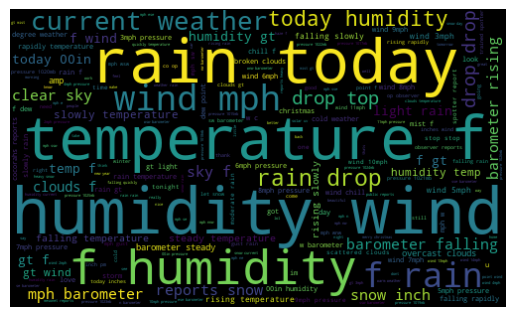

In [399]:
# Plot World Cloud
allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [400]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

# Create new column Analysis add apply getAnalysis function
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the Dataframe
df.to_csv('result.csv')
df

/var/folders/j7/c_52fhp529x6fgq4gf072b300000gn/T/ipykernel_17078/2328287782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Polarity'].apply(getAnalysis)


,Unnamed: 0,Date,Tweet,State/City,Country,Polarity,Analysis
0,0.0,2016-12-31 23:59:59+00:00,wind 2 mph nw barometer 993 3 mb rising slowly...,Minoa,United States,-0.300000,Negative
1,1.0,2016-12-31 23:59:58+00:00,temp 58 0 f wind 2 0mph pressure 29 966hpa ste...,Mississippi,United States,0.166667,Positive
2,2.0,2016-12-31 23:59:58+00:00,wind 0 0 mph barometer 29 91 rising temperatur...,Petersburg,United States,0.000000,Neutral
3,3.0,2016-12-31 23:59:57+00:00,wind 6 0 mph sw barometer 29 984 falling tempe...,Howell,United States,0.000000,Neutral
4,4.0,2016-12-31 23:59:55+00:00,wind 0 mph barometer 29 777 falling temperatur...,Great Falls,United States,0.000000,Neutral
...,...,...,...,...,...,...,...
100094,99994.0,2016-12-19 14:13:03+00:00,please stop shaking snow globe dammit 2 inches...,Erie,United States,-0.500000,Negative
100095,99995.0,2016-12-19 14:12:56+00:00,big whiny little bitch high school came weather,Valparaiso,United States,-0.009167,Negative
100096,99996.0,2016-12-19 14:12:42+00:00,hate cold weather,Illinois,United States,-0.700000,Negative
100097,99997.0,2016-12-19 14:12:38+00:00,great game rain,Indiana,United States,0.200000,Positive


# Total Positive, Negative and Neutral

In [401]:
# Counting positive, negative and neutral tweets
positive = 0
negative = 0
neutral = 0

for posi in df['Polarity']:
      if posi>0:
            positive = positive +1
      elif posi<0:
            negative = negative + 1
      else:
            neutral = neutral + 1
data = []
data.append([positive, negative, neutral])
columns = ['Positive', 'Negative', 'Neutral']
df2 = pd.DataFrame(data, columns=columns)

df2

,Positive,Negative,Neutral
0,36149,15254,39691


In [428]:
# Getting the percentage
pttweets = df[df.Analysis == 'Neutral']
pttweets = pttweets['Tweet']
round( (pttweets.shape[0] / df.shape[0]) *100,1)

43.6

In [403]:
# Number of tweets that contains rain
rain_tweets_amount = df[df["Tweet"].str.contains("rain")].shape[0]
rain_tweets_amount

38005

In [404]:
# Number of tweets that contains snow
snow_tweets_amount = df[df["Tweet"].str.contains("snow")].shape[0]
print(snow_tweets_amount)

23322


In [405]:
# Number of tweets that doesnt contain snow or rain
rest_tweets_amount = df.shape[0] - (snow_tweets_amount + rain_tweets_amount)
rest_tweets_amount

29767

# All Tweets Weather Events

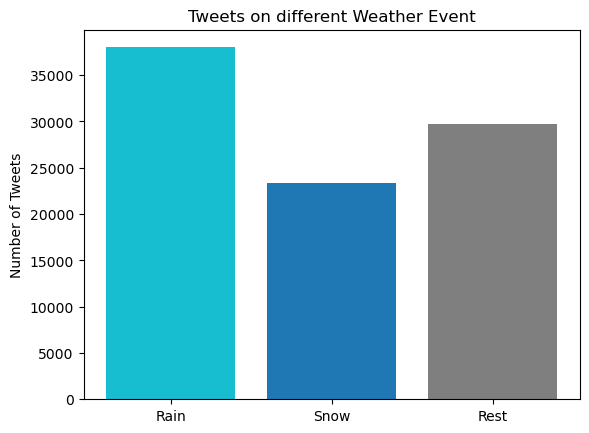

In [406]:
fig, ax = plt.subplots()

events = ['Rain', 'Snow', 'Rest']
counts = [rain_tweets_amount, snow_tweets_amount, rest_tweets_amount]

bar_colors = ['tab:cyan', 'tab:blue', 'tab:gray']

ax.bar(events, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Number of Tweets')
ax.set_title('Tweets on different Weather Event')


plt.show()

# Texas Negative Tweets

In [407]:

texas_negative_tweets = df[(df["State/City"].str.contains("Texas") == True) & (df['Analysis'] == "Negative")]
# Reseting index
texas_negative_tweets = texas_negative_tweets.reset_index(drop=True)

# Top 7 States/Cities with most Tweets

<AxesSubplot:xlabel='States/Cities', ylabel='Number of Tweets'>

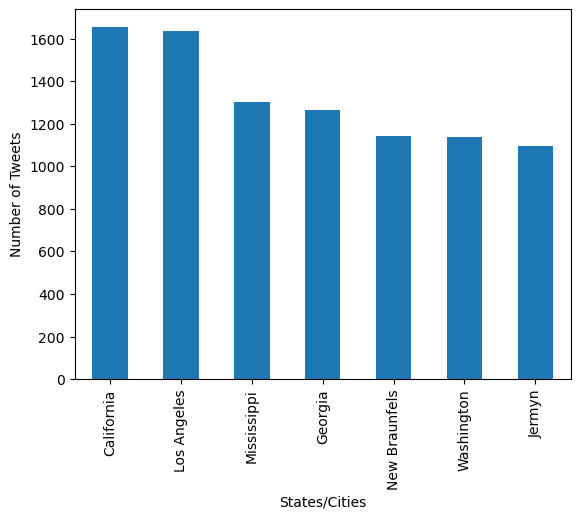

In [408]:
import matplotlib.pyplot as plt

df['State/City'].value_counts().head(7).plot(kind='bar',x='State/City',ylabel='Number of Tweets', xlabel='States/Cities')


# Places with most Positive and Negative Tweets

In [409]:
# Calculating States with most Positive and Negative Tweets 
df2 = df.loc[(df['Analysis'] == "Positive")]
df3 = df.loc[(df['Analysis'] == "Negative")]
# Sorting descendingly
most_positive_states = df2.groupby(['State/City'])['Analysis'].count().sort_values(ascending=False).to_frame(name = 'Positive count').reset_index()

most_negative_states = df3.groupby(['State/City'])['Analysis'].count().sort_values(ascending=False).to_frame(name = 'Negative count').reset_index()
# Positive dataframe sorted descending
most_positive_states_states = most_positive_states[most_positive_states.columns[0]]
most_positive_states_count = most_positive_states[most_positive_states.columns[1]]
most_positive_states.head(7)

,State/City,Positive count
0,Los Angeles,701
1,California,653
2,Mississippi,530
3,Grass Valley,474
4,Texas,419
5,Manhattan,396
6,Florida,377


In [410]:
# Negative dataframe, sorted descending
most_negative_states_states = most_negative_states[most_negative_states.columns[0]]
most_negative_states_count = most_negative_states[most_negative_states.columns[1]]
most_negative_states.head(7)

,State/City,Negative count
0,Weirton,504
1,New Braunfels,472
2,Cloverville,402
3,Los Angeles,295
4,Minnesota,279
5,Alabama,276
6,Virginia,267


# Positive Tweets Chart

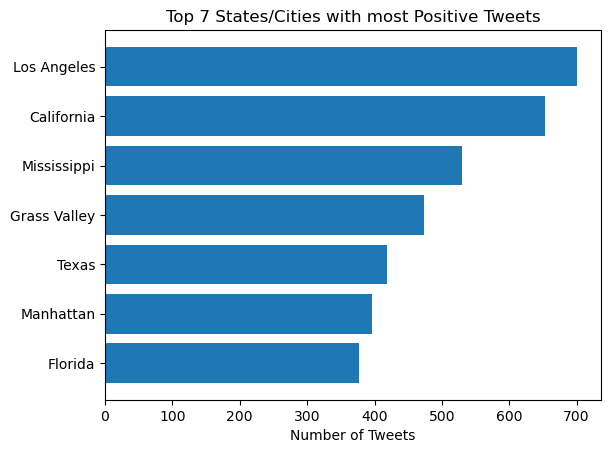

In [411]:
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(most_positive_states_states.head(7), most_positive_states_count.head(7), align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Tweets')
ax.set_title('Top 7 States/Cities with most Positive Tweets')

plt.show()

# Negative Tweets Chart

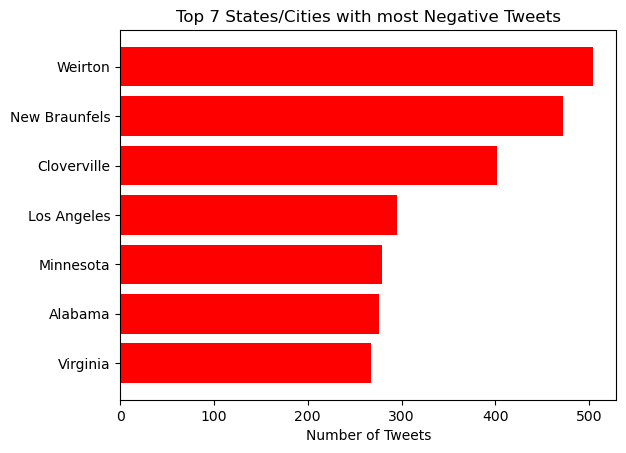

In [412]:
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(most_negative_states_states.head(7), most_negative_states_count.head(7), align='center', color='red')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Tweets')
ax.set_title('Top 7 States/Cities with most Negative Tweets')

plt.show()

# Places with positive Tweets on rain

In [413]:
rain_positive = df[(df["Tweet"].str.contains("rain") == True) & (df['Analysis'] == "Positive")]
rain_positive = rain_positive.groupby(['State/City'])['Analysis'].count().sort_values(ascending=False).to_frame(name = 'Positive count').reset_index()
rain_positive.head(10)

,State/City,Positive count
0,Mississippi,508
1,Grass Valley,474
2,Los Angeles,383
3,Jermyn,276
4,Texas,264
5,Lakeshore,207
6,Ohio,203
7,Bloomfield,193
8,Georgia,174
9,California,167


<AxesSubplot:ylabel='State/City'>

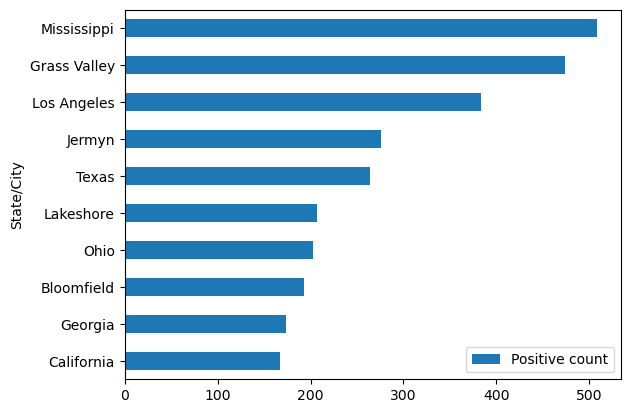

In [414]:
rain_positive.head(10).sort_values('Positive count', ascending=True).plot(kind='barh',x='State/City')

# Places with negative Tweets on rain

In [415]:
rain_negative = df[(df["Tweet"].str.contains("rain") == True) & (df['Analysis'] == "Negative")]
rain_negative = rain_negative.groupby(['State/City'])['Analysis'].count().sort_values(ascending=False).to_frame(name = 'Negative count').reset_index()
rain_negative.head(10)

,State/City,Negative count
0,Weirton,504
1,New Braunfels,470
2,Cloverville,401
3,Alabama,252
4,Minnesota,244
5,Virginia,209
6,La Grange,187
7,Richmond,183
8,Los Angeles,178
9,Bloomfield,173


<AxesSubplot:ylabel='State/City'>

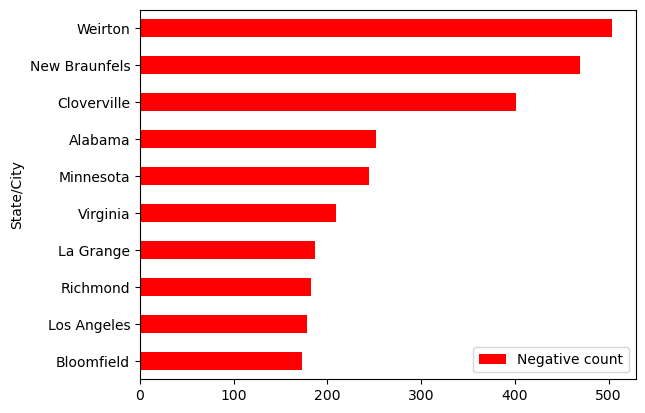

In [416]:
rain_negative.head(10).sort_values('Negative count', ascending=True).plot(kind='barh',x='State/City', color='red')

# Place with positive Tweets on snow

In [417]:
snow_positive = df[(df["Tweet"].str.contains("snow") == True) & (df['Analysis'] == "Positive")]
snow_positive = snow_positive.groupby(['State/City'])['Analysis'].count().sort_values(ascending=False).to_frame(name = 'Positive count').reset_index()
snow_positive.head(10)

,State/City,Positive count
0,California,280
1,New Hampshire,152
2,New York,147
3,Pennsylvania,138
4,Washington,125
5,Maine,122
6,Colorado,111
7,Manhattan,103
8,Los Angeles,79
9,Vermont,70


<AxesSubplot:ylabel='State/City'>

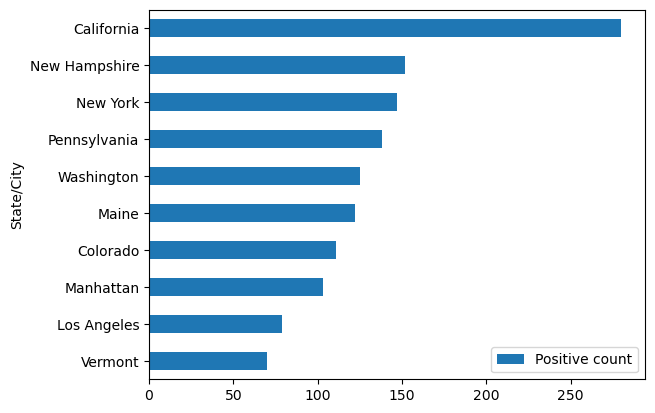

In [418]:
snow_positive.head(10).sort_values('Positive count', ascending=True).plot(kind='barh',x='State/City')

# Places with negative Tweets on snow

In [419]:
snow_negative = df[(df["Tweet"].str.contains("snow") == True) & (df['Analysis'] == "Negative")]
snow_negative = snow_negative.groupby(['State/City'])['Analysis'].count().sort_values(ascending=False).to_frame(name = 'Negative count').reset_index()
snow_negative.head(10)

,State/City,Negative count
0,Idaho,116
1,Wyoming,105
2,California,85
3,Washington,80
4,New York,78
5,Colorado,73
6,Pennsylvania,51
7,Montana,41
8,Michigan,41
9,Maine,35


<AxesSubplot:ylabel='State/City'>

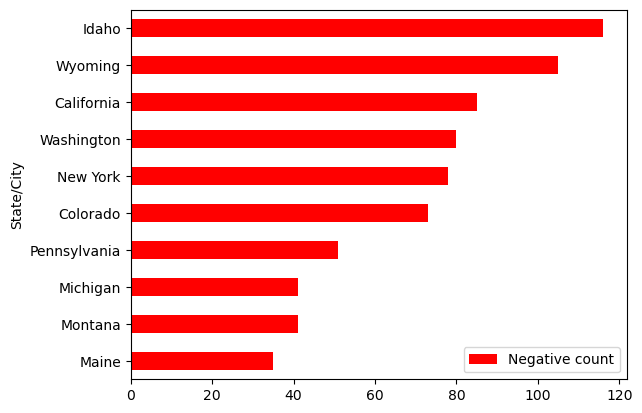

In [420]:
snow_negative.head(10).sort_values('Negative count', ascending=True).plot(kind='barh',x='State/City', color='red')